<a href="https://colab.research.google.com/github/ntp-nguyen/Mini-Project/blob/main/The_law_of_large_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
population_size = 230_000

sample_size = 50
number_of_samples = 500

108.56446524669427


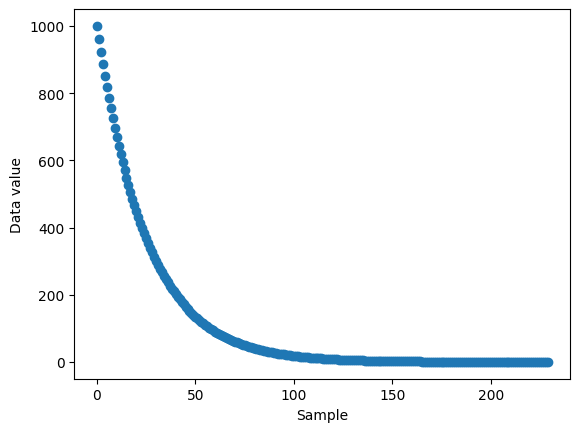

In [20]:
#Generating a population of number
population = 1/ np.logspace(np.log10(0.001),np.log10(10),population_size)
population_mean = np.mean(population)

plt.plot(population[::1000],'o')
plt.xlabel('Sample')
plt.ylabel('Data value')
plt.show()

In [6]:
#Shuffle data
np.random.shuffle(population)

In [37]:
sample_mean = np.zeros(number_of_samples)
for i in range(number_of_samples):
  random = np.random.choice(population, 50)
  sample_mean[i] = np.mean(random)

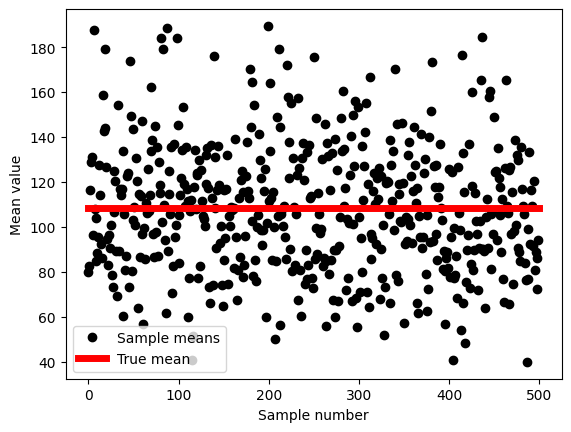

In [38]:
plt.plot(sample_mean, 'ko', label='Sample means')
plt.plot([0,500],[population_mean, population_mean],label='True mean', color='red', linewidth=5)

plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.legend()
plt.show()

In [39]:
#Cummulative average
''' c_avg = np.zeros(number_of_samples)
avg = 0
for i in range(number_of_samples):
  if i != 0:
    avg = (avg*i + sample_mean[i])/(i+1)
    c_avg[i] = avg
  if i == 0:
    avg = sample_mean[i]
    c_avg[i] = avg '''

In [46]:
c_avg_alt = np.cumsum(sample_mean)/(np.arange(1,number_of_samples+1))

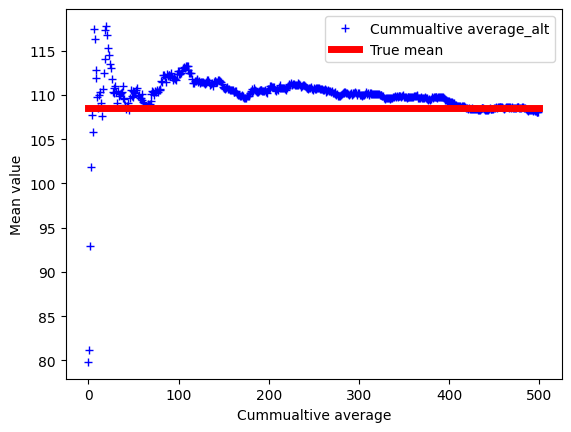

In [48]:
#plt.plot(c_avg, 'ko', label='Cummualtive average')
plt.plot(c_avg_alt, 'b+', label='Cummualtive average_alt')
plt.plot([0,500],[population_mean, population_mean],label='True mean', color='red', linewidth=5)

plt.xlabel('Cummualtive average')
plt.ylabel('Mean value')
plt.legend()
plt.show()

In [68]:
number_of_meta_samples = 100
c_avg_2 = np.zeros((number_of_meta_samples,number_of_samples))
all_sample_mean = np.zeros((number_of_meta_samples,number_of_samples))

for metai in range(number_of_meta_samples):
  for i in range(number_of_samples):
    random = np.random.choice(population, 50)
    sample_mean[i] = np.mean(random)

  #Get cummulative average
  temp = np.cumsum(sample_mean)/(np.arange(1,number_of_samples+1))
  c_avg_2[metai,:] = (temp - population_mean)**2

  #Store all sample_mean
  all_sample_mean[metai,:] = sample_mean

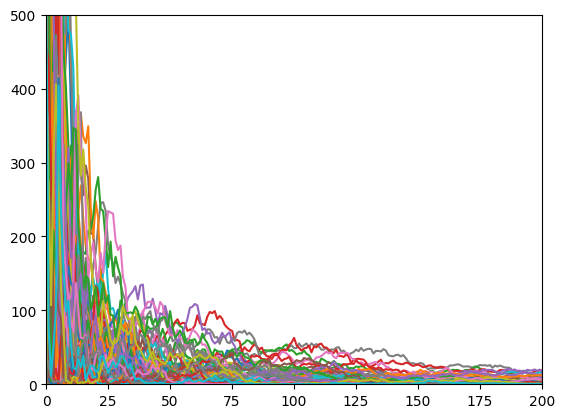

In [64]:
plt.plot(c_avg_2.T)
plt.ylim([0,500])
plt.xlim([0,200])
plt.show()

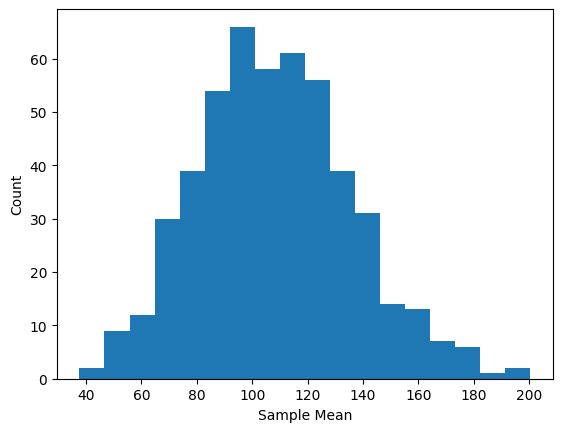

In [70]:
#Central limit theorem
plt.hist(sample_mean, bins='fd')
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()

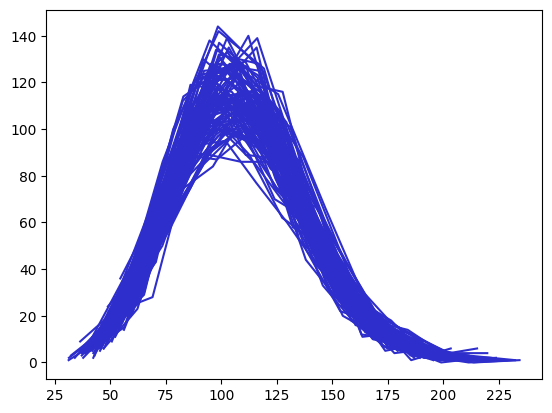

In [76]:
for i in range(number_of_meta_samples):
  y,x = np.histogram(all_sample_mean[i,])
  x = (x[1:] + x[:-1])/2 #get the avg of two adjacent numbers to reduce one unit of the size
  plt.plot(x,y,color=(.18,.18,.8))
plt.show()